In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Simple Linear Regression/delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.shape

(21, 2)

In [6]:
df[df.duplicated()]

,Delivery Time,Sorting Time


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A9AB07A30>,
      dtype=object)

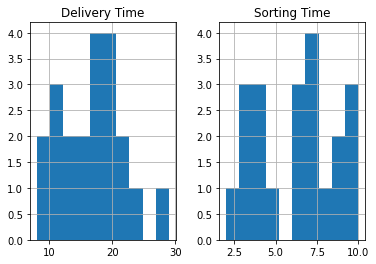

In [7]:
df.hist()

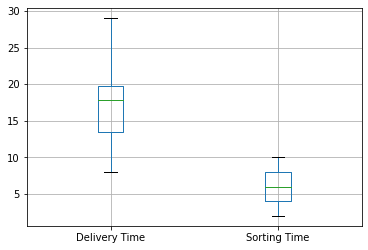

In [8]:
df.boxplot()

In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


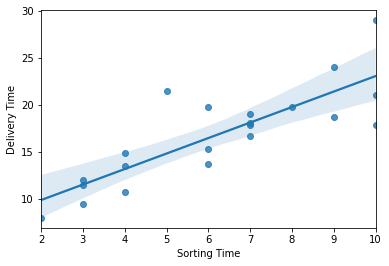

In [10]:
sn.regplot(x='Sorting Time', y = 'Delivery Time', data = df)

In [11]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
# Fit linear regression model
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime", data = df).fit()


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 06 May 2022   Prob (F-statistic):           3.98e-06
Time:                        09:41:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
new_data=pd.Series([11,15])
new_data

0    11
1    15
dtype: int64

In [16]:
data_pred=pd.DataFrame(new_data,columns=['SortingTime'])
data_pred

,SortingTime
0,11
1,15


In [17]:
model.predict(data_pred)

0    24.721953
1    31.318032
dtype: float64

In [18]:
# Applying log transformation

df_log = df
df_log_data = np.log(df_log)
df_log_data

,DeliveryTime,SortingTime
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A9B2346D0>,
      dtype=object)

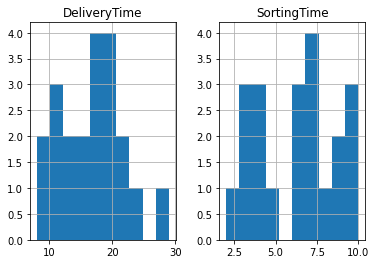

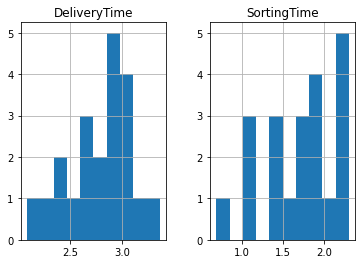

In [19]:
df.hist()
df_log_data.hist()

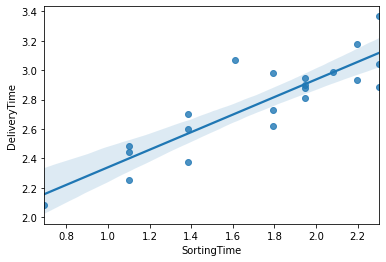

In [22]:
sn.regplot(x='SortingTime', y = 'DeliveryTime', data = df_log_data)

In [24]:
# Fit linear regression model - Log
import statsmodels.formula.api as smf
model_log = smf.ols("DeliveryTime~SortingTime", data = df_log_data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.60e-07
Time:                        10:27:43   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A9B2F9340>,
      dtype=object)

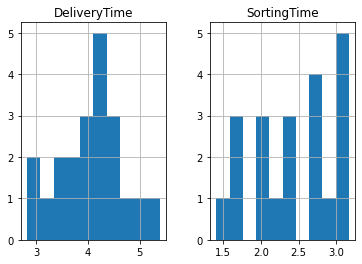

In [25]:
# Apply square root tranformation
df_sq = df
df_sq_data = np.sqrt(df_sq)
df_sq_data.hist()

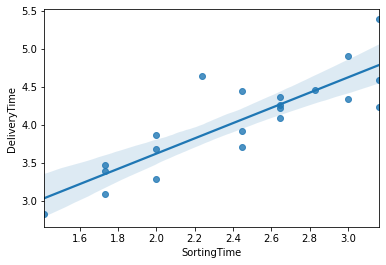

In [26]:
sn.regplot(x='SortingTime', y = 'DeliveryTime', data = df_sq_data)

In [27]:
# Fit linear regression model - Log
import statsmodels.formula.api as smf
model_log = smf.ols("DeliveryTime~SortingTime", data = df_log_data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.60e-07
Time:                        10:30:35   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""